# Project description

## Goal

## Process

> ## Trying to find some interesting comparisons

<AxesSubplot:xlabel='Gender Amount', ylabel='Gender'>

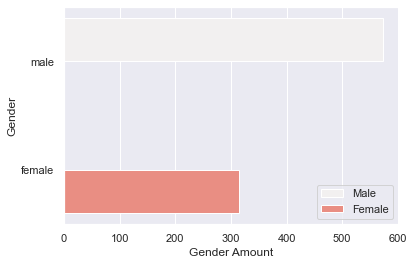

In [26]:
# Reading Data
import numpy as np
import pandas as pd
import seaborn as sns # for plotting 
sns.set_theme()

titanic_data = pd.read_csv("../datasets/titanic.csv")

passengers = pd.DataFrame()
passengers["Gender Amount"] = titanic_data["Sex"].value_counts()
passengers.index.name = "Gender"
passengers.reset_index(inplace=True)
passengers.dropna(axis=1, how='any')

sns.barplot(x="Gender Amount", y="Gender", data=passengers, color="salmon", estimator=np.median, hue=["Male", "Female"])

             Total     %
Cabin          687  77.1
Age            177  19.9
Embarked         2   0.2
PassengerId      0   0.0
Survived         0   0.0
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\SaschaButhelezi\anaconda3\envs\uk259\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


C:\Users\SaschaButhelezi\anaconda3\envs\uk259\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\SaschaButhelezi\anaconda3\envs\uk259\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


C:\Users\SaschaButhelezi\anaconda3\envs\uk259\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SaschaButhelezi\anaconda3\envs\uk259\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\SaschaButhelezi\anaconda3\envs\uk259\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(






testing predictions:


[0]


<AxesSubplot:xlabel='feature'>

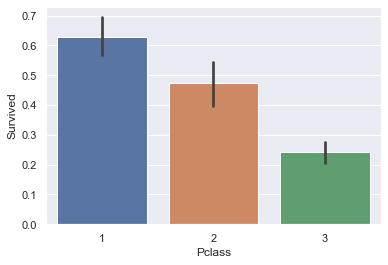

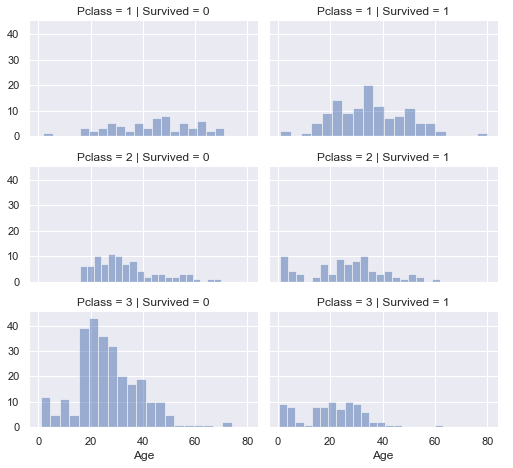

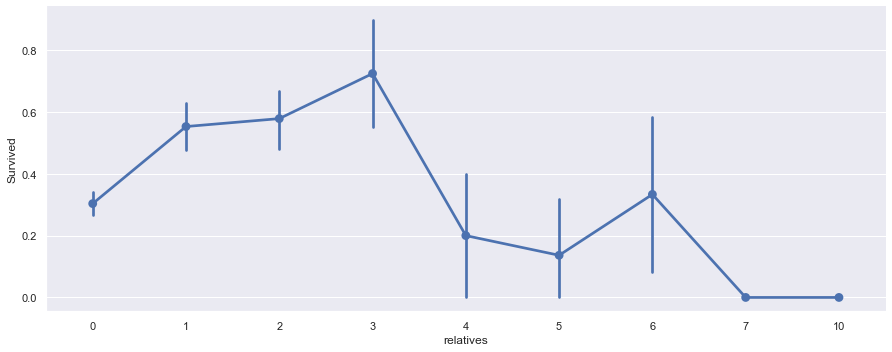

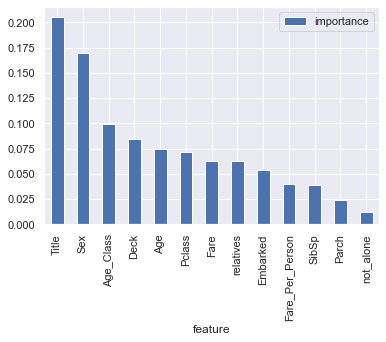

In [55]:
# Survivors

## Reading Data
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

titanic_data = pd.read_csv("../datasets/Titanic/train.csv")
test_data = pd.read_csv("../datasets/Titanic/test.csv")

#print("\n\n\n\nInfo: ")

#print(titanic_data.info()) # -> see all tables and their content datatypes + null values

#print("\n\n\n\nDescribe: ")

#print(titanic_data.describe()) # -> see some base statistical values lik 38% Survived, Age ranges from 0.4 -> 80

#print("\n\n\n\nHead: ")

#print(titanic_data.head()) # -> see ...


#Taking a better look at the missing data:
total = titanic_data.isnull().sum().sort_values(ascending=False)
percent_1 = titanic_data.isnull().sum()/titanic_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
print(missing_data.head(5))


# Display Columns 
print(titanic_data.columns.values)


# Display Age and Gender distribution
# survived = 'survived'
# not_survived = 'not survived'
# fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
# women = titanic_data[titanic_data['Sex']=='female']
# men = titanic_data[titanic_data['Sex']=='male']
# ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
# ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
# ax.legend()
# ax.set_title('Female')
# ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
# ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
# ax.legend()
# _ = ax.set_title('Male')
# print(ax)


# Display facet grid
# FacetGrid = sns.FacetGrid(titanic_data, row='Embarked', size=4.5, aspect=1.6)
# FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
# FacetGrid.add_legend()
# print(FacetGrid)


# Display the relevance of the passanger classes
bar = sns.barplot(x='Pclass', y='Survived', data=titanic_data)
print(bar)


# Compare Class, Age and Fate
grid = sns.FacetGrid(titanic_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();
print(grid)

# ======================
# Display the total amount of siblings and partners abroad form the survivors and the unfortunate
data = [titanic_data, test_data]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
titanic_data['not_alone'].value_counts()


# Show the spread of relative amount compared with fate. It turns out one would have a better fate when having 1 - 3 relatives. 6 is an Outlier
axes = sns.factorplot('relatives','Survived', data=titanic_data, aspect = 2.5)
print(axes)
# ======================

# STANDARDIZING 

# Drop unnecessary column
titanic_data = titanic_data.drop(['PassengerId'], axis=1)



# Remove and standardize cabin values
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
temp_data = [titanic_data, test_data]

for dataset in temp_data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
titanic_data = titanic_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)



# Standardize ages
temp_data = [titanic_data, test_data]

for dataset in temp_data:
    mean = titanic_data["Age"].mean()
    std = titanic_data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = titanic_data["Age"].astype(int)
titanic_data["Age"].isnull().sum()

# Standardize Embark. Luckily only 2 values are missing so let's just fill it with the most common data
common_value = 'S'
temp_data = [titanic_data, test_data]
for dataset in temp_data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)



# CONVERSION

# Plan is to convert some of the columns datatypes that can be better interpreted with the rest of the columns

# Fare : float to integer
temp_data = [titanic_data, test_data]

for dataset in temp_data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

# Name : Idea is to strip titles from names, to be added as another feature
temp_data = [titanic_data, test_data]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in temp_data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
titanic_data = titanic_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)


# Convert Gender into numerical values
genders = {"male": 0, "female": 1}
data = [titanic_data, test_data]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)


# Tickets values are too broad and complex for standardizing
titanic_data = titanic_data.drop(['Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)


# Convert
ports = {"S": 0, "C": 1, "Q": 2}
temp_data = [titanic_data, test_data]

for dataset in temp_data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)


# Create Age groups
temp_data = [titanic_data, test_data]
for dataset in temp_data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7


# Create Fare groups
temp_data = [titanic_data, test_data]
for dataset in temp_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

# Create age group
temp_data = [titanic_data, test_data]
for dataset in temp_data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']


# Set Fare per Person
for dataset in temp_data:
    dataset['Fare_Per_Person'] = dataset['Fare'] / (dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)


# Training 
X_titanic = titanic_data.drop("Survived", axis=1)
Y_titanic = titanic_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1).copy()




# Here comes some internet magic


# Stochastic Gradient Descent (SGD)
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_titanic, Y_titanic)
Y_pred = sgd.predict(X_test)
sgd.score(X_titanic, Y_titanic)
acc_sgd = round(sgd.score(X_titanic, Y_titanic) * 100, 2)



# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_titanic, Y_titanic)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_titanic, Y_titanic)
acc_random_forest = round(random_forest.score(X_titanic, Y_titanic) * 100, 2)



# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_titanic, Y_titanic)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_titanic, Y_titanic) * 100, 2)



# K Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_titanic, Y_titanic)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_titanic, Y_titanic) * 100, 2)



# Gaussian Naive Bayes => classification technique
gaussian = GaussianNB()
gaussian.fit(X_titanic, Y_titanic) 
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_titanic, Y_titanic) * 100, 2)



# Perceptron => neural network
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_titanic, Y_titanic)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_titanic, Y_titanic) * 100, 2)



# Linear Support Vector Machine => regression
linear_svc = LinearSVC()
linear_svc.fit(X_titanic, Y_titanic)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_titanic, Y_titanic) * 100, 2)



# Decision => classification (regression trees)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_titanic, Y_titanic)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_titanic, Y_titanic) * 100, 2)


print("\n\n\n\ntesting predictions:\n\n")
print(linear_svc.predict(X_test.iloc[:1]))


# Results which has the best accuracy + precision

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)


# Display importance thanks to random forest
importances = pd.DataFrame({'feature':X_titanic.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()


https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

